In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df = pd.read_csv('merge/mitm.csv')

## 150000 x 84![topology](mitm.png)



![topology](mitm.png)



In [4]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)
accuracies = []

In [5]:
df['marker'].value_counts()

marker
m_sp_na_1_DoS    115419
NORMAL            35569
Name: count, dtype: int64

In [6]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,marker
0,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,25/04/2020 12:31:42 AM,118476352,80,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.683681,1.480954e+06,2.711242e+06,11294052.0,13.0,107182300.0,1.356738e+06,2.488950e+06,10070608.0,13.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.675240,0.008441,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,80,0,1,0,-1,-1,0,0,5.719808e+06,7.890355e+06,19050369.0,345.0,7843768.4,1.946617e+06,11294052.0,5509647.0,NORMAL
1,192.168.1.255-192.168.1.25-137-137-17,192.168.1.25,137,192.168.1.255,137,17,25/04/2020 12:31:41 AM,119701989,140,1,7000.0,50.0,50.0,50.0,50.0,0.000000,50.0,50.0,50.0,0.000000,5.889626e+01,1.177925,8.550142e+05,1.511606e+05,1094377.0,745523.0,118953101.0,8.557777e+05,1.514361e+05,1094377.0,745523.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,1120,8,1.169571,0.008354,50.0,50.0,50.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,50.35461,50.0,50.0,0,0,0,0,0,0,140,7000,1,50,-1,-1,140,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,m_sp_na_1_DoS
2,192.168.1.20-192.168.1.21-2869-50014-6,192.168.1.21,50014,192.168.1.20,2869,6,25/04/2020 12:33:44 AM,914,3,7,309.0,5901.0,309.0,0.0,103.0,178.401233,1460.0,0.0,843.0,724.872632,6.794311e+06,10940.919037,1.015556e+02,1.385551e+02,391.0,0.0,487.0,2.435000e+02,2.241528e+02,402.0,85.0,914.0,152.333333,196.766528,493.0,0.0,0,0,0,0,60,164,3282.275711,7658.643326,0.0,1460.0,564.545455,686.792452,471683.872727,0,1,0,0,0,0,0,0,2.0,621.00000,103.0,843.0,0,0,0,0,0,0,3,309,7,5901,-1,256,1,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,m_sp_na_1_DoS
3,192.168.1.20-192.168.1.21-2869-50014-6,192.168.1.21,50014,192.168.1.20,2869,6,25/04/2020 12:33:44 AM,115,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,17391.304348,1.150000e+02,0.000000e+00,115.0,115.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,20,20,8695.652174,8695.652174,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.00000,0.0,0.0,0,0,0,0,0,0,1,0,1,0,-1,16425,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,m_sp_na_1_DoS
4,134.221.96.0-0.0.0.51-0-0-0,134.221.96.0,0,0.0.0.51,0,0,25/04/2020 12:31:54 AM,82657208,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.036294,4.132860e+07,3.738942e+06,43972435.0,38684773.0,38684773.0,3.868477e+07,0.000000e+00,38684773.0,38684773.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.024196,0.012098,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,2,0,1,0,-1,-1,0,0,0.000000e+00,0.000000e+00,0.0,0.0,41328604.0,3.738942e+06,43972435.0,38684773.0,NORMAL


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['marker'] = encoder.fit_transform(df['marker'])
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,marker
0,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,25/04/2020 12:31:42 AM,118476352,80,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.683681,1.480954e+06,2.711242e+06,11294052.0,13.0,107182300.0,1.356738e+06,2.488950e+06,10070608.0,13.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.675240,0.008441,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,80,0,1,0,-1,-1,0,0,5.719808e+06,7.890355e+06,19050369.0,345.0,7843768.4,1.946617e+06,11294052.0,5509647.0,0
1,192.168.1.255-192.168.1.25-137-137-17,192.168.1.25,137,192.168.1.255,137,17,25/04/2020 12:31:41 AM,119701989,140,1,7000.0,50.0,50.0,50.0,50.0,0.000000,50.0,50.0,50.0,0.000000,5.889626e+01,1.177925,8.550142e+05,1.511606e+05,1094377.0,745523.0,118953101.0,8.557777e+05,1.514361e+05,1094377.0,745523.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,1120,8,1.169571,0.008354,50.0,50.0,50.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,50.35461,50.0,50.0,0,0,0,0,0,0,140,7000,1,50,-1,-1,140,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1
2,192.168.1.20-192.168.1.21-2869-50014-6,192.168.1.21,50014,192.168.1.20,2869,6,25/04/2020 12:33:44 AM,914,3,7,309.0,5901.0,309.0,0.0,103.0,178.401233,1460.0,0.0,843.0,724.872632,6.794311e+06,10940.919037,1.015556e+02,1.385551e+02,391.0,0.0,487.0,2.435000e+02,2.241528e+02,402.0,85.0,914.0,152.333333,196.766528,493.0,0.0,0,0,0,0,60,164,3282.275711,7658.643326,0.0,1460.0,564.545455,686.792452,471683.872727,0,1,0,0,0,0,0,0,2.0,621.00000,103.0,843.0,0,0,0,0,0,0,3,309,7,5901,-1,256,1,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1
3,192.168.1.20-192.168.1.21-2869-50014-6,192.168.1.21,50014,192.168.1.20,2869,6,25/04/2020 12:33:44 AM,115,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,17391.304348,1.150000e+02,0.000000e+00,115.0,115.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,20,20,8695.652174,8695.652174,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.00000,0.0,0.0,0,0,0,0,0,0,1,0,1,0,-1,16425,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1
4,134.221.96.0-0.0.0.51-0-0-0,134.221.96.0,0,0.0.0.51,0,0,25/04/2020 12:31:54 AM,82657208,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.036294,4.132860e+07,3.738942e+06,43972435.0,38684773.0,38684773.0,3.868477e+07,0.000000e+00,38684773.0,38684773.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.024196,0.012098,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,2,0,1,0,-1,-1,0,0,0.000000e+00,0.000000e+00,0.0,0.0,41328604.0,3.738942e+06,43972435.0,38684773.0,0


In [8]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)
X_train = X_train.drop(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp'], axis=1)

X_test = X_test.drop(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp'], axis=1)


<font color="lightseagreen" size=+2.5><b>XGBClassifier</b></font>

XGBClassifier :  
 Accuracy Score : 0.91
 Precision Score: 0.90
 Recall Score   : 1.00
 f1 Score       : 0.94 

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.64      0.77      7226
           1       0.90      1.00      0.94     22910

    accuracy                           0.91     30136
   macro avg       0.94      0.82      0.86     30136
weighted avg       0.92      0.91      0.90     30136
 



Text(0.5, 1.0, 'XGBClassifier Confusion Matrix')

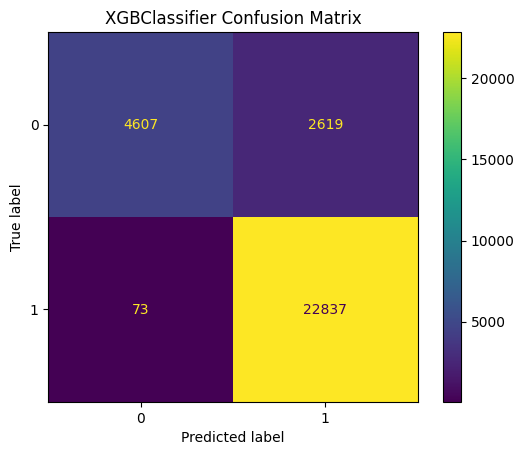

In [9]:
# XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_XGBClassifier = xgb.predict(X_test)
accuracies.append(accuracy_score(y_test,y_pred_XGBClassifier))
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print("XGBClassifier :  ")
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
cmap = sns.color_palette("gray", as_cmap=True)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_XGBClassifier)).plot()
plt.title('XGBClassifier Confusion Matrix')

<font color="lightseagreen" size=+2.5><b>LogisticRegressionClassifier</b></font>

LogisticRegressionClassifier:
 Train set score: 0.84
 Accuracy Score : 0.84
 Precision Score: 0.84
 Recall Score   : 0.98
 f1 Score       : 0.90 

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.39      0.54      7226
           1       0.84      0.98      0.90     22910

    accuracy                           0.84     30136
   macro avg       0.86      0.69      0.72     30136
weighted avg       0.85      0.84      0.82     30136
 

 Confusion Matrix:
 [[ 2802  4424]
 [  384 22526]]


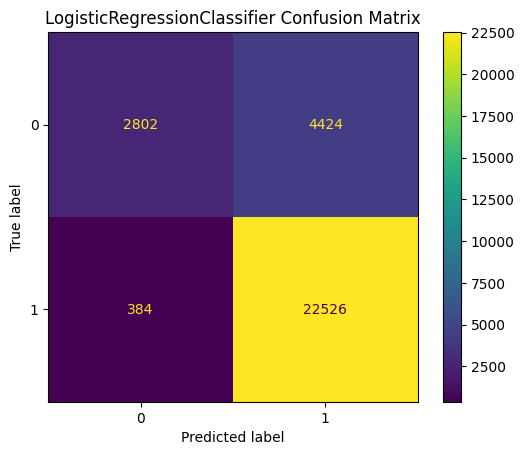

In [10]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc.fit(X_train, y_train)
y_pred_LogisticRegression = lrc.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)
accuracies.append(accuracy_score(y_test,y_pred_LogisticRegression))

print("LogisticRegressionClassifier:")
print(f"\033[031m\033[1m","Train set score: {:.2f}".format(lrc.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_LogisticRegression)).plot()

# plot_confusion_matrix(LogisticRegression, X_test, y_test);
plt.title('LogisticRegressionClassifier Confusion Matrix');

## SVM

SVM: 
 Train set score: 0.83
 Accuracy Score : 0.83
 Precision Score: 0.87
 Recall Score   : 0.91
 f1 Score       : 0.89 

 Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.59      0.62      7226
           1       0.87      0.91      0.89     22910

    accuracy                           0.83     30136
   macro avg       0.77      0.75      0.76     30136
weighted avg       0.82      0.83      0.83     30136
 

 Confusion Matrix:
 [[ 4246  2980]
 [ 2154 20756]]


Text(0.5, 1.0, 'SVM Confusion Matrix')

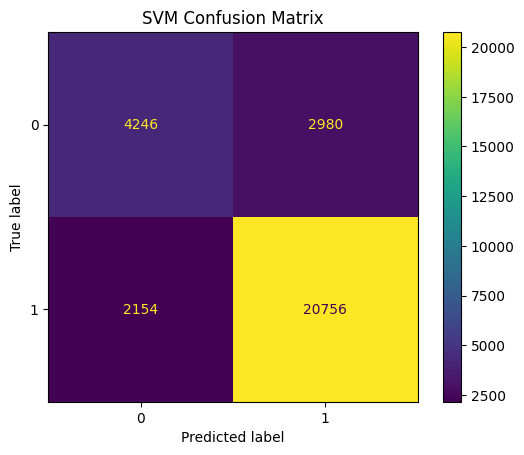

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC(C=1)

svm.fit(X_train, y_train)

y_pred_SVM = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_SVM)
accuracies.append(accuracy)

print("SVM: ")
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(svm.score(X_train, y_train)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_SVM)))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_SVM)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_SVM)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_SVM)), '\n')
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_SVM), '\n')
print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_SVM)).plot()

plt.title('SVM Confusion Matrix')


Ensemble Model Accuracy(SVM+XGB,stacking): 0.9104061587470136
 Train set score: 0.83
 Accuracy Score : 0.91
 Precision Score: 0.90
 Recall Score   : 0.99
 f1 Score       : 0.94 

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.64      0.77      7226
           1       0.90      0.99      0.94     22910

    accuracy                           0.91     30136
   macro avg       0.94      0.82      0.86     30136
weighted avg       0.92      0.91      0.90     30136
 

 Confusion Matrix:
 [[ 4644  2582]
 [  118 22792]]
Stacking Ensemble Model Accuracy: 0.9104061587470136


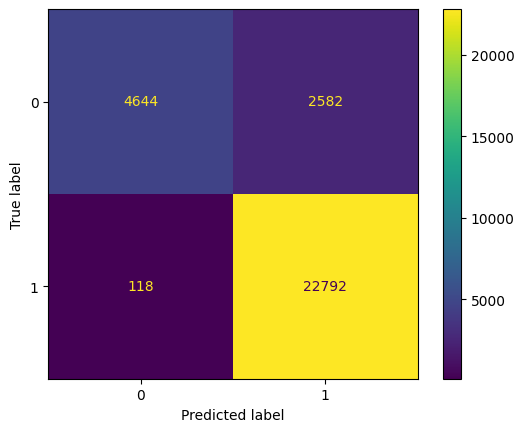

In [15]:
#stacking SVM + XGB
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(
    estimators=[('svm', svm), ('xgb', xgb)],
    final_estimator=svm 
)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_stacking)
accuracies.append(accuracy)
print(f"Ensemble Model Accuracy(SVM+XGB,stacking): {accuracy}")
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(svm.score(X_train, y_train)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_stacking)), '\n')
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_stacking), '\n')
print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking)).plot()

print(f"Stacking Ensemble Model Accuracy: {accuracy}")

Ensemble Model Accuracy(SVM+LRC,stacking): 0.8515396867533847
 Train set score: 0.83
 Accuracy Score : 0.85
 Precision Score: 0.86
 Recall Score   : 0.96
 f1 Score       : 0.91 

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.49      0.61      7226
           1       0.86      0.96      0.91     22910

    accuracy                           0.85     30136
   macro avg       0.84      0.73      0.76     30136
weighted avg       0.85      0.85      0.84     30136
 

 Confusion Matrix:
 [[ 3565  3661]
 [  813 22097]]
Stacking Ensemble Model Accuracy: 0.8515396867533847


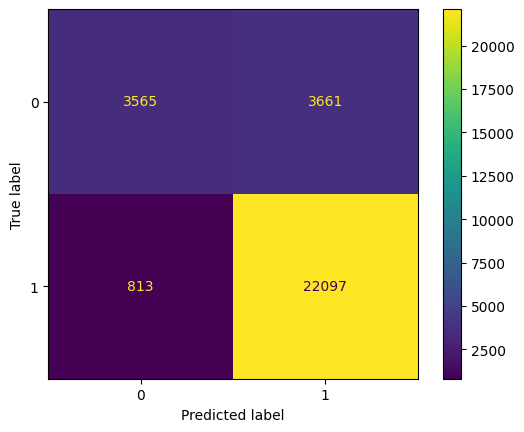

In [16]:
#stacking SVM + LRC
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(
    estimators=[('svm', svm), ('lrc', lrc)],
    final_estimator=svm 
)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_stacking)
accuracies.append(accuracy)
print(f"Ensemble Model Accuracy(SVM+LRC,stacking): {accuracy}")
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(svm.score(X_train, y_train)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_stacking)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_stacking)), '\n')
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_stacking), '\n')
print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking)).plot()

print(f"Stacking Ensemble Model Accuracy: {accuracy}")
